<a href="https://colab.research.google.com/github/pacayton/Stat_268_Advanced_Time_Series_Analysis/blob/main/Stat_268_Week2_Intervention_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Stat 268: Advanced Time Series Analysis
$$\quad$$
#### Assoc Prof Peter Julian Cayton, PhD
#### School of Statistics
#### University of the Philippines Diliman
#### [Google Scholar](https://scholar.google.com/citations?user=KtH_mGEAAAAJ)




In [10]:
## Preamble: Please install the following packages before running the codes

install.packages("TSA")
install.packages("forecast")
install.packages("tidyverse")

library(TSA)
library(forecast)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ readr::spec()   masks TSA::spec()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Interrupted Time Series Analysis (ITSA)

*   Also known as "intervention analysis". (TSAAR)
*   It is a system of methods in time series analysis to extract insights on the nature and impact of interventions in the behavior of the phenomenon as observed from the time series data. (TSAAR)
* It is also a field in causal inference in which the causal effect of interventions, such as policies, are analyzed from the shifts in the behavior observed from time series data. (ITSAOUP)

## Interventions

* events in the history of the phenomenon that leads to changes in behavior that are observable in the time series data.
* These changes may be abrupt or gradual, and their impact may be permanent or temporary (ITSASP)
* Examples: policy changes, new laws, changes in government/management, reforms, change in practices, mergers and acquisitions, weather events, sudden events.



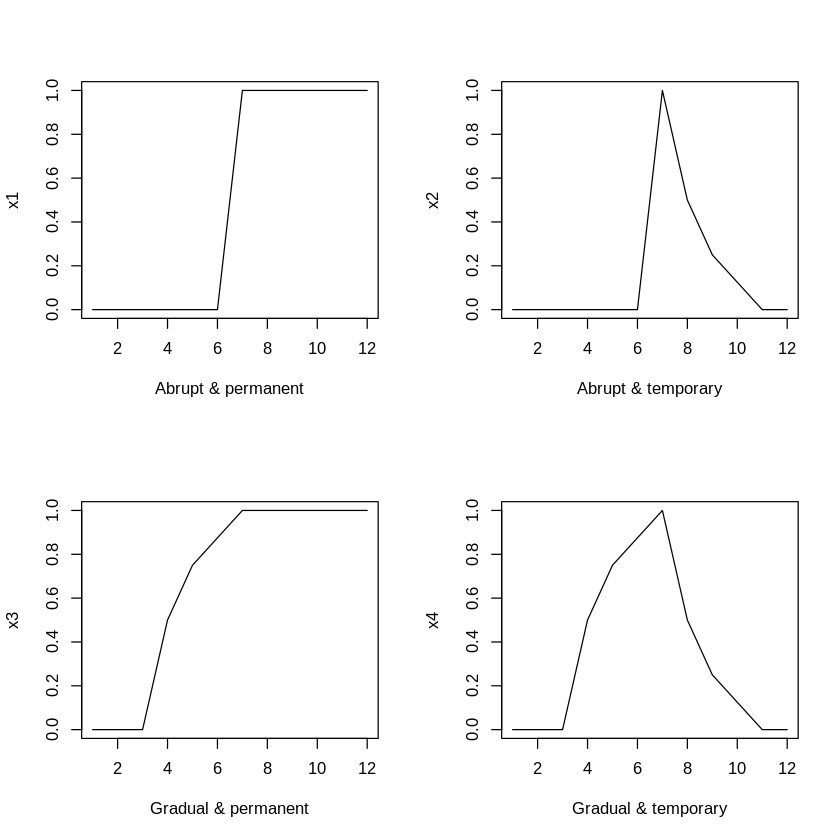

In [ ]:
## Examples of Observed Impact of Interventions in Time Series Data

par(mfrow =c(2,2)) ## displays graphs in 2 rows and 2 columns

x1 <- c(0,0,0,0,0,0,1,1,1,1,1,1) ## Abrupt & permanent
x2 <- c(0,0,0,0,0,0,1, 0.5, 0.25, 0.125,0,0) ## Abrupt & temporary
x3 <- c(0,0,0,0.5, 0.75, 0.875, 1,1,1,1,1,1) ## Gradual & permanent
x4 <- c( 0,0,0,0.5, 0.75, 0.875, 1, 0.5, 0.25, 0.125,0,0) ## Gradual & temporary

plot(x1, xlab = "Abrupt & permanent", type = "l")
plot(x2, xlab = "Abrupt & temporary", type = "l")
plot(x3, xlab = "Gradual & permanent", type = "l")
plot(x4, xlab = "Gradual & temporary", type = "l")

Comment: The gradual-temporary combination is rarely used in practice, though one can create a model that simulates the occurrence, as shown here, and can fit it with data once we have discussed the basics of ITSA. I will leave that to the exploration of the reader.

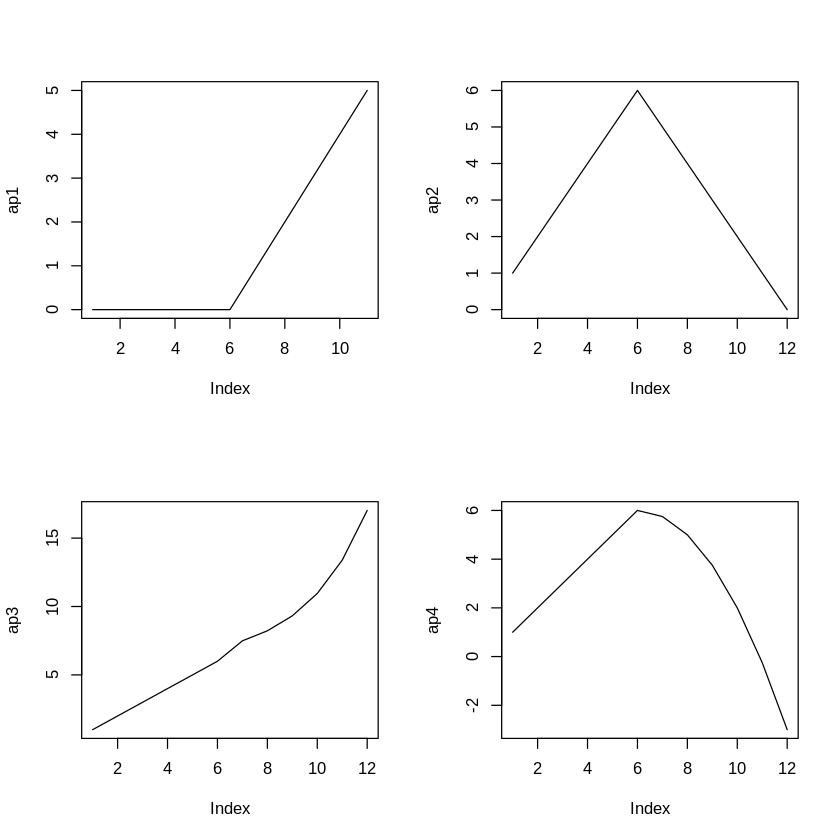

In [ ]:
## Other (Non-exhaustive) Examples of Abrupt & Permanent Changes

par(mfrow =c(2,2))

ap1 <- c(0,0,0,0,0,0,1,2,3,4,5)
ap2 <- c(1,2,3,4,5,6,5,4,3,2,1,0)
ap3 <- c(1,2,3,4,5, 6, 6+exp(0.4), 6+exp(0.8), 6+exp(1.2), 6+exp(1.6), 6+exp(2), 6+exp(2.4) )
ap4 <- c(1,2,3,4,5, 6, 6-(0.5)^2, 6-(1)^2, 6-(1.5)^2, 6-(2)^2, 6-(2.5)^2, 6-(3)^2 )

plot(ap1, type = "l")
plot(ap2, type = "l")
plot(ap3, type = "l")
plot(ap4, type = "l")

Comment: There are many manifestations of the abrupt-permanent intervention, especially in practice.

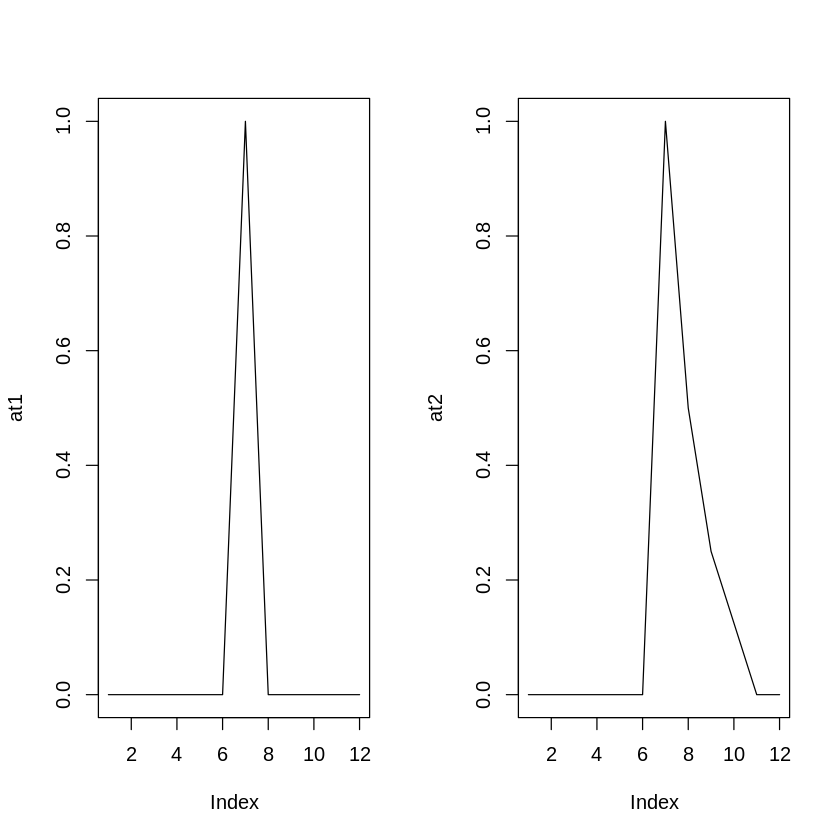

In [ ]:
## Two Types of Abrupt-Temporary Changes

par(mfrow = c(1,2))

at1 <- c(0,0,0,0,0,0,1,0,0,0,0,0)
at2 <- c(0,0,0,0,0,0,1, 0.5, 0.25, 0.125,0,0)

plot(at1, type="l")
plot(at2, type="l")



Comment: The occurrence of the first type as seen above may be called an additive outlier effect and is only isolated for 1 point in time and has no effect in the succeeding progression of the time series data.

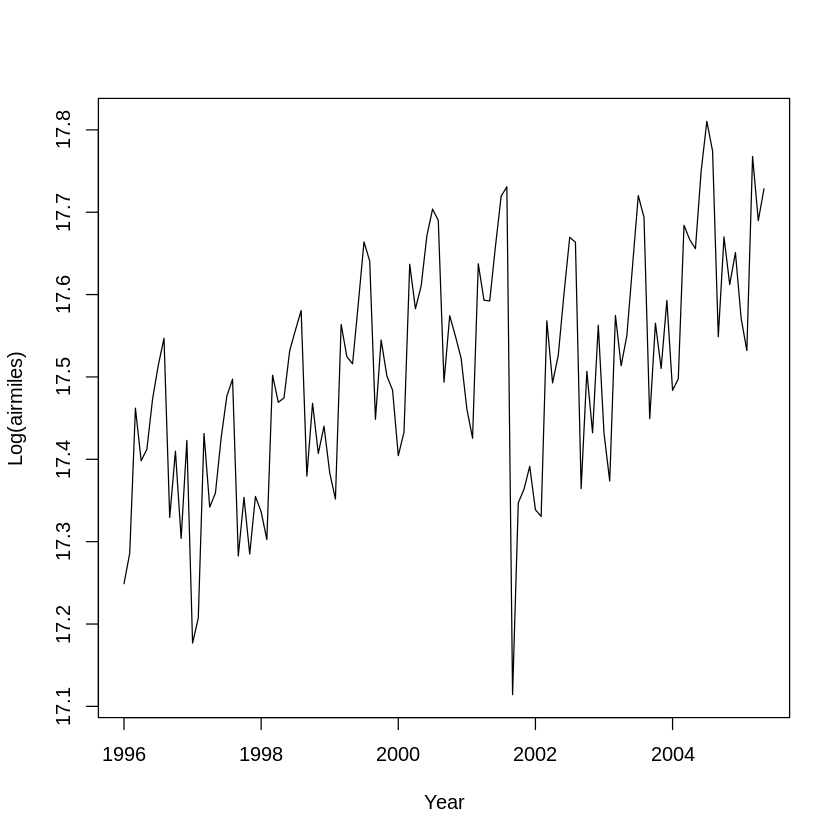

In [ ]:
## Data Example, Monthly U.S. Airline Miles: January 1996 through May 2005 (TSAAR)

data(airmiles)
plot(log(airmiles),ylab='Log(airmiles)',xlab='Year')

Comment: there is a noticeable drop  in air miles flown by tourists aligning with the occurrence of the Sept 11, 2001 terrorism attacks on the US. It is seen that there is some observable change in the time series but the nature of the shift, whether abrupt or gradual, with prmanent or temporary change, is still to be answered.

## The Simple Intervention Model (ITSAOUP, TSAAR)

$$ Y_t = L (ϵ_t) + X(I_t)$$

where

$Y_t = $ time series data,

$ L (ϵ_t) =$ time series model specification independent of the intervention effect and typically contains the error terms, e.g., ARIMA

$X(I_t) = $ the intervention impact/effect term which contains the shift in the behavior of the time series, e.g., different ARIMA dynamics or a new term in the model.

Suppose that an intervention event happened at time $t = T^*$.

The subset of the time series data $\{ Y_t , t < T^* \}$ is called the *pre-intervention data*. The data subset may be used to specify the model of the $L(\epsilon_t)$.


### Intervention Variable Terms

#### Step Function

The step function at time $t$ with the intervention event starting at time period $T^*$ is defined as $S_t^{(T^*)}$ with

$$ S_t^{(T^*)} = 1, if \quad t \ge T^*  $$
$$ S_t^{(T^*)} = 0, otherwise  $$

#### Pulse Function

The pulse function at time $t$ with the intervention event starting at time $T^*$ is defined as $P_t^{(T^*)}$ with

$$ P_t^{(T^*)} = 1, if \quad t = T^*  $$
$$ P_t^{(T^*)} = 0, otherwise  $$

So, it is simply a spike function. Alternatively, one can define $P_t^{(T^*)}$ as

$$P_t^{(T^*)} = S_t^{(T^*)} - S_{t-1}^{(T^*)} = (1-B) S_t^{(T^*)}$$

And similarly,

$$S_t^{(T^*)} = \frac{1}{1-B}P_t^{(T^*)}$$

[1] 0 0 0 0 0 0 1 1 1 1 1 1

[1] NA  0  0  0  0  0  1  0  0  0  0  0

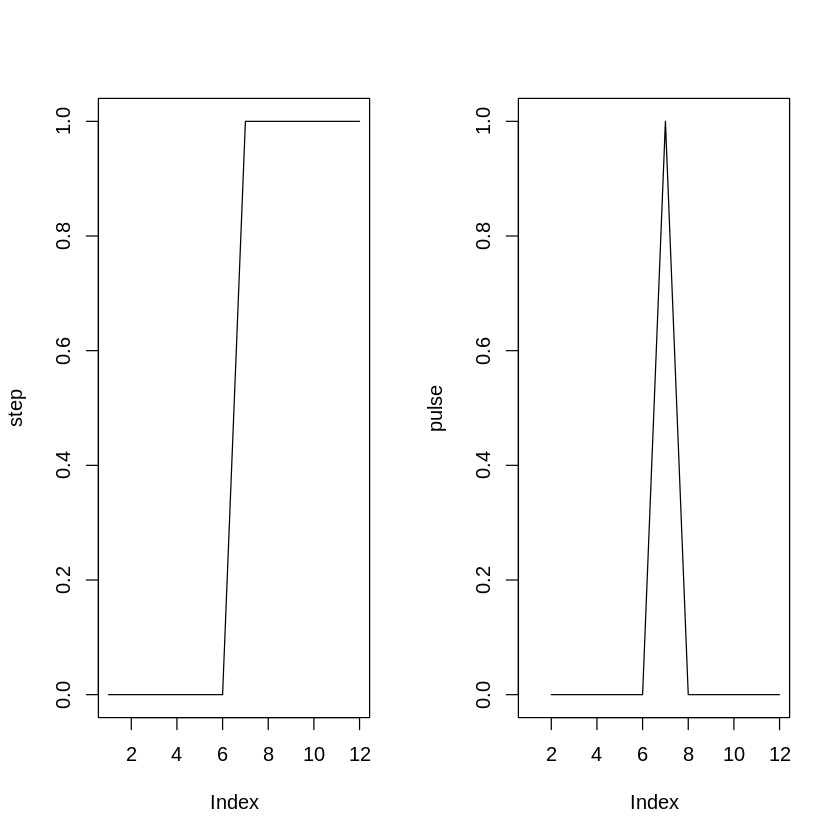

In [ ]:
## The Step and Pulse Functions

## Suppose the Intervention Event started at the
## 7th period in this data of 12 time series periods

step <- c(rep(0, times = 6), rep(1, times = 6))
pulse <- c( NA, diff(step) ) ## diff() does first-order adjacent differencing
## but diff forgets to place an NA in the beginning for general use. Technically,
## it should be 0 by definition of the pulse function.

## Show the time series
step
pulse

## Plot the Functions

par(mfrow = c(1,2))

plot(step, type = "l")
plot(pulse, type = "l")

### Modeling $X(I_t)$

We would often model the impact of interventions with $X()$ specified as a *transfer function*.

Transfer functions are time series model specifications applied on the independent variables, e.g. covariates, treatment/policy variables, when used for time series regression.

Depending on the structure of $X()$, certain types of intervention effects may be observed. In terms of model term, let me use $m_t = $ model structure of $X(I_t)$, i.e.,

$$Y_t =L(\epsilon_t) + m_t$$

Examples:

* $m_t = \omega S_t^{T^*}$ is an abrupt-permanent change with constant impact $\omega$
* $m_t = \omega S_{t-d}^{T^*}$ is an abrupt-permanent change with intervention event in time $T^*$ but its impact has a delay $d$
* $m_t = \delta m_{t-1} + \omega S_t^{T^*} ⇒ m_t = \frac{\omega}{1-\delta B} S_t^{T^*} $ gives a gradual-permanent change with exponential transition parameter $\delta$.
* $m_t = \omega P_t^{T^*}$ is a abrupt-temporary change that is an additive outlier
* $m_t = \delta m_{t-1} + \omega P_t^{T^*} ⇒ m_t = \frac{\omega}{1-\delta B} P_t^{T^*} $ is a abrupt-temporary change with exponential decay $\delta$. As $\delta \rightarrow 1$, $m_t = \omega S_t^{T^*} $

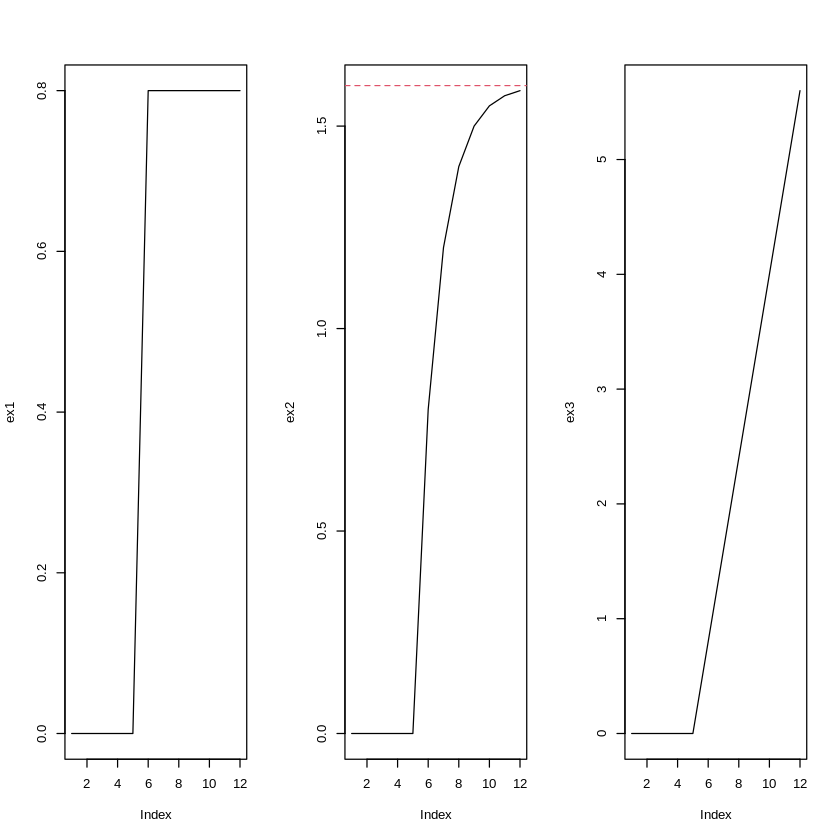

In [25]:
## Examples of some intervention impacts depending on intervention model

par(mfrow = c(1,3))
# For the sake of example,
w <-  0.8
delta <- 0.5
T_int <- 5 # = intervention event
delay <- 1
n <- 12 # total periods

# 1. w x B x S_t , simple shift in level, with 1 period delay.

S_t <- c(rep(0,times = T_int - 1), rep(1,times = n - T_int + 1)) ## Original S_t
BS_t <- c(0, lag(S_t, delay)[-(1:delay)] ) ## lagged S_t: We remove the NA at the beginning and replace them with 0.
ex1 <- w*BS_t

plot(ex1, type = "l")

# 2. w x B / (1 - delta x B) x S_t , a gradual and permanent shift to a new level
# equivalent to m_t = delta x m_{t-1} + w x B x S_t

ex2 <- c() ## empty vessel

ex2[1] <- 0 ## starting value for the loop

for (i in 2:12) {
  ex2[i] <- delta * ex2[i-1] + ex1[i]
}

plot(ex2, type = "l")
abline(h =w/(1-delta), col = 2, lty = 2) ## highlights the convergence to w/(1-delta) = 1.6

# 3. w x B / (1 - B) x S_t , an abrupt and permanent shift to a new slope = w
# equivalent to m_t = m_{t-1} + w x B x S_t

ex3 <- c() ## empty vessel

ex3[1] <- 0 ## starting value for the loop

for (i in 2:12) {
  ex3[i] <- ex3[i-1] + ex1[i]
}

plot(ex3, type = "l")